# LGBM & XGBM

### Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.


In [1]:
# Titanic Dataset - LightGBM vs XGBoost
# Install required libraries in Colab
!pip install lightgbm xgboost


In [147]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import xgboost as xgb

## Exploratory Data Analysis (EDA):


1.	Load the Titanic dataset using Python's pandas library.


In [148]:
# Load train (with target) and test (without target)
train = pd.read_csv("Titanic_train.csv")   # replace with actual path
test = pd.read_csv("Titanic_test.csv")

In [149]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
train.head()

Train Shape: (891, 12)
Test Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.	Check for missing values.

In [150]:
# Check missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [151]:
# Make a copy to avoid accidental overwrite
train1 = train.copy()
test1 = test.copy()

In [152]:
# Numeric columns (Age, Fare)
num_imputer = SimpleImputer(strategy="median")
train1[['Age']] = num_imputer.fit_transform(train1[['Age']])
test1[['Age']] = num_imputer.transform(test1[['Age']])

test1[['Fare']] = num_imputer.fit_transform(test1[['Fare']])

# Categorical column (Embarked) – use most frequent (mode)
cat_imputer = SimpleImputer(strategy="most_frequent")
train1[['Embarked']] = cat_imputer.fit_transform(train1[['Embarked']])
test1[['Embarked']] = cat_imputer.transform(test1[['Embarked']])
## we will drop cabin because lot of mising  values

In [153]:
# Check missing values
print(train1.isnull().sum())
print(test1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [154]:
#duplcates check
print(train1.duplicated().sum())
print(test1.duplicated().sum())

0
0


3.	Explore data distributions using histograms and box plots.

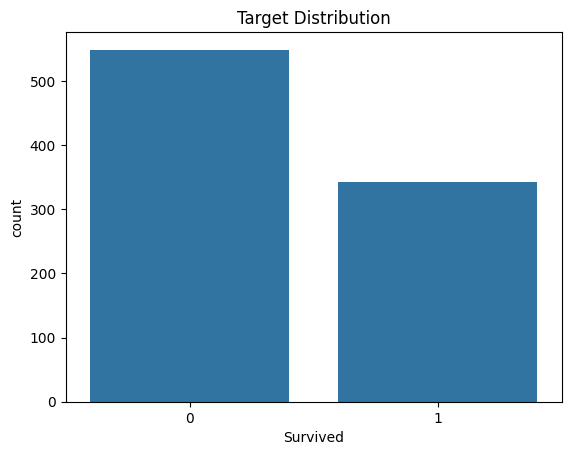

In [155]:
# Plot distribution of 'Survived'
sns.countplot(x='Survived', data=train1)
plt.title("Target Distribution") ##Target is distributed people who not survied is high
plt.show()

4.	Visualize relationships between features and survival using scatter plots and bar plots.

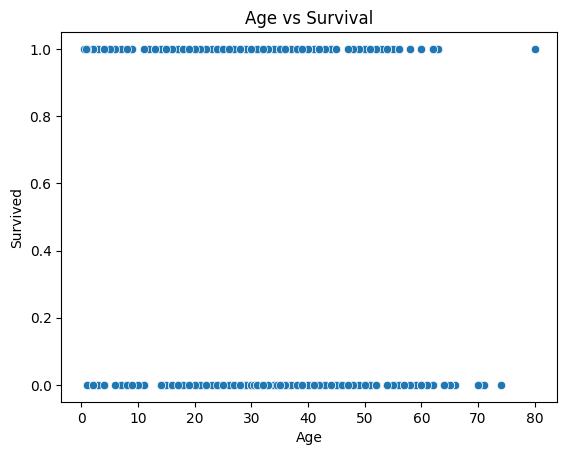

In [156]:
# Relationship bretween features and survival using scatter plot
sns.scatterplot(x='Age', y='Survived', data=train1)
plt.title("Age vs Survival")
plt.show()

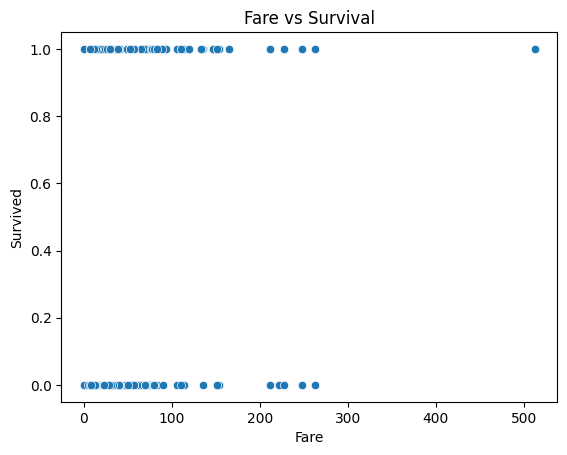

In [157]:
#another scatter plot
sns.scatterplot(x='Fare', y='Survived', data=train1)
plt.title("Fare vs Survival")
plt.show()

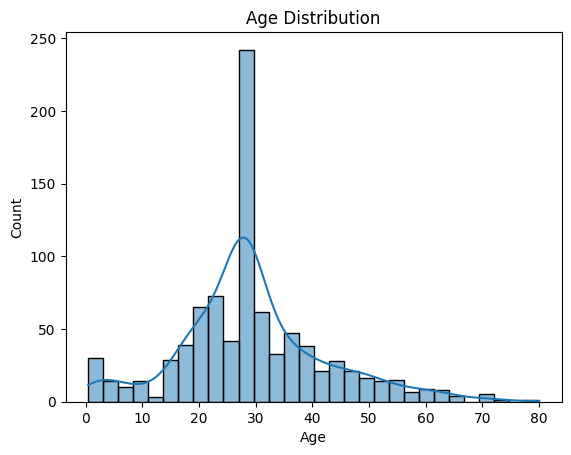

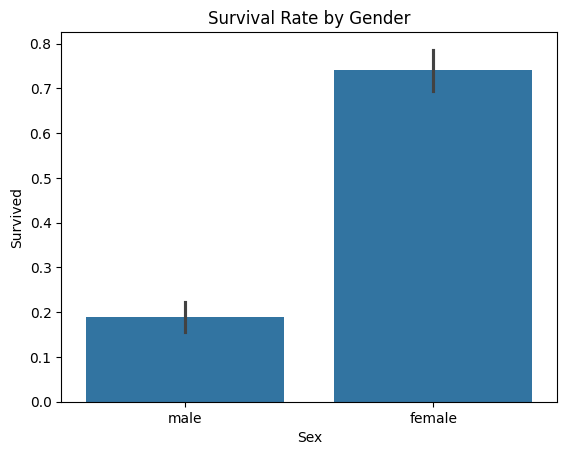

In [158]:
# Histogram of Age
sns.histplot(train1['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution") ##Age distribution
plt.show()

# Survival by Gender
sns.barplot(x='Sex', y='Survived', data=train1) #women survived more than men
plt.title("Survival Rate by Gender")
plt.show()

In [159]:
# Drop unnecessary columns (like Name, Ticket, Cabin)
drop_cols = ['Name', 'Ticket', 'Cabin']
train1 = train1.drop(columns=drop_cols)
test1 = test1.drop(columns=drop_cols)

In [160]:
print(train1.isnull().sum())
print(test1.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


2.	Encode categorical variables using one-hot encoding or label encoding.

In [161]:
# Encode categorical columns (Sex, Embarked)
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train1[col] = le.fit_transform(train1[col])
    test1[col] = le.transform(test1[col])

In [162]:
train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [163]:
test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [164]:
# Separate features and target
X = train1.drop(columns=['Survived'])
y = train1['Survived']

Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.


2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.


In [165]:
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

3.	Build predictive models using LightGBM and XGBoost algorithms.


4.	Train the models on the training set and evaluate their performance on the testing set.


In [166]:
import lightgbm as lgb
import xgboost as xgb

In [167]:
# Train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [168]:
# Predict on validation
y_pred_lgb = lgb_model.predict(X_val)
y_pred_proba_lgb = lgb_model.predict_proba(X_val)[:, 1]
y_pred_proba_lgb

array([0.01333094, 0.0359228 , 0.04100573, 0.01716265, 0.35459536,
       0.3953247 , 0.71691261, 0.93706466, 0.93359246, 0.12726772,
       0.55945851, 0.06731694, 0.06886574, 0.02769153, 0.00703185,
       0.1774137 , 0.0744198 , 0.01378249, 0.00215119, 0.99020392,
       0.04529824, 0.83491624, 0.00837953, 0.3688061 , 0.08220698,
       0.99835108, 0.05436244, 0.16263724, 0.03622618, 0.11221818,
       0.03281448, 0.98099875, 0.0446144 , 0.23420068, 0.10351205,
       0.91652447, 0.0438004 , 0.246997  , 0.381632  , 0.98760868,
       0.08933708, 0.99730482, 0.08516776, 0.98755096, 0.95984403,
       0.05962632, 0.09302094, 0.73673708, 0.94697391, 0.9704891 ,
       0.9988697 , 0.14126284, 0.96170139, 0.04720242, 0.80592391,
       0.03284449, 0.00688248, 0.77462046, 0.90376666, 0.8319847 ,
       0.44018348, 0.9505711 , 0.02952244, 0.04443777, 0.90843665,
       0.11171611, 0.98970567, 0.03187159, 0.25407066, 0.02954811,
       0.98994067, 0.01410539, 0.94054994, 0.99819066, 0.01369

In [169]:
print("LightGBM Results:")
print(classification_report(y_val, y_pred_lgb)) #here we get 78% accurscy

LightGBM Results:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



In [170]:
# Train XGBoost
xgb_model= xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [171]:
# Predict on validation for xgboost
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_pred_proba_xgb

array([2.32280605e-02, 7.36018317e-03, 2.75956821e-02, 3.07628955e-03,
       4.86358762e-01, 2.82070458e-01, 9.31697965e-01, 9.80115294e-01,
       9.77160931e-01, 9.10893604e-02, 6.77078307e-01, 1.81819238e-02,
       1.72407180e-02, 3.55169550e-02, 8.15628283e-03, 3.88502926e-02,
       8.21886864e-03, 1.27323074e-02, 9.82378959e-04, 9.97407377e-01,
       1.32633001e-02, 9.52682853e-01, 4.61489428e-03, 4.81905550e-01,
       6.98388666e-02, 9.99462426e-01, 7.48853534e-02, 1.34037077e-01,
       1.25695810e-01, 8.97650421e-02, 6.70579225e-02, 9.97041166e-01,
       4.04190123e-02, 6.15952849e-01, 1.42807122e-02, 9.26284969e-01,
       1.39083089e-02, 6.41518950e-01, 2.83348590e-01, 9.85678732e-01,
       1.42725259e-01, 9.97779310e-01, 1.06370099e-01, 9.73167419e-01,
       9.87603605e-01, 2.51895655e-02, 1.70184467e-02, 8.06006134e-01,
       9.85996902e-01, 9.79097426e-01, 9.99300838e-01, 8.37374926e-02,
       9.73702431e-01, 9.58000422e-02, 8.53375077e-01, 7.12562874e-02,
      

In [172]:
print("XGBoost Results:")
print(classification_report(y_val, y_pred_xgb))## accuracy is 75% in xgb

XGBoost Results:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [173]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Use Stratified K-Fold cross-validation to preserve class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [174]:
#import LGBM Classifier
import lightgbm as lgb

In [175]:
# Define model
lgb1= lgb.LGBMClassifier(random_state=42)

# Define hyperparameter grid
lgb_param_grid = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [3, 5, -1],   # -1 means no limit
                  'num_leaves': [15, 31, 63]}

# GridSearchCV
lgb_grid = GridSearchCV(lgb1, lgb_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
lgb_grid.fit(X, y)

print("Best LightGBM Parameters:", lgb_grid.best_params_)
print("Best LightGBM CV Accuracy:", lgb_grid.best_score_) ##after Cross validation and hyperparameter tunning

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
Best LightGBM Parameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best LightGBM CV Accuracy: 0.8282468143870443


In [176]:
#import xgb
import xgboost as xgb

In [178]:
# Define model
xgb1= xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Define hyperparameter grid
xgb_param_grid = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [3, 5, 7],'subsample': [0.8, 1.0]}
# GridSearchCV for xgb1 (for tunning)
xgb_grid = GridSearchCV(xgb1, xgb_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
xgb_grid.fit(X, y)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost CV Accuracy:", xgb_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost CV Accuracy: 0.8293641328227983


In [186]:
#Comparing results after tunning using best_score_
results_tuned = pd.DataFrame({ "Model": ["LightGBM", "XGBoost"],"Best Accuracy (CV)": [lgb_grid.best_score_, xgb_grid.best_score_]})

print(results_tuned)

      Model  Best Accuracy (CV)
0  LightGBM            0.828247
1   XGBoost            0.829364


### Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.


2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.776536   0.730159  0.666667  0.696970
1   XGBoost  0.754190   0.698413  0.637681  0.666667 



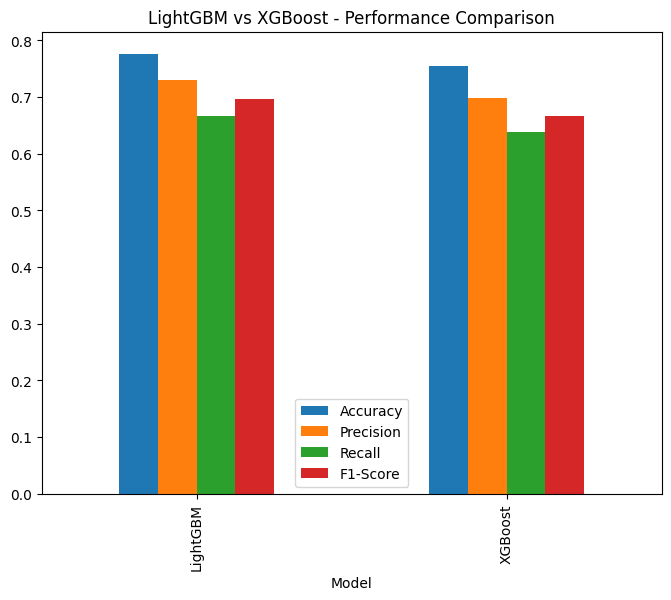

In [180]:
# Collect results in a table
results = pd.DataFrame({"Model": ["LightGBM", "XGBoost"],"Accuracy": [ accuracy_score(y_val, y_pred_lgb),accuracy_score(y_val, y_pred_xgb) ],
"Precision": [precision_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_xgb)],"Recall": [recall_score(y_val, y_pred_lgb),recall_score(y_val, y_pred_xgb)],
    "F1-Score": [f1_score(y_val, y_pred_lgb),f1_score(y_val, y_pred_xgb)]})
print(results,'\n')

# Bar plot comparison
results.set_index("Model").plot(kind="bar", figsize=(8,6))
plt.title("LightGBM vs XGBoost - Performance Comparison")
plt.show()


      Model  Best Accuracy (CV)
0  LightGBM            0.828247
1   XGBoost            0.829364


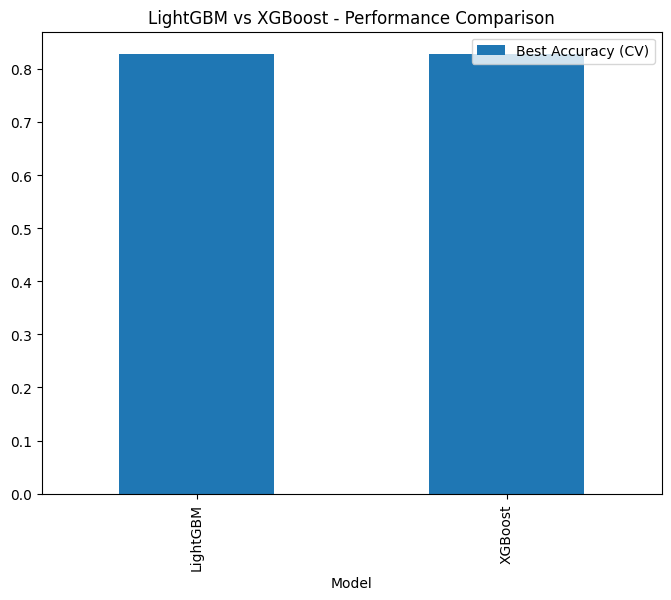

In [187]:
results_tuned = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],"Best Accuracy (CV)": [lgb_grid.best_score_, xgb_grid.best_score_]})
print(results_tuned)


# Bar plot comparison
results_tuned.set_index("Model").plot(kind="bar", figsize=(8,6))
plt.title("LightGBM vs XGBoost - Performance Comparison")
plt.show() ##after tunnig both giving same accuracy

In [184]:
# Final prediction using the trained LightGBM model with test dataset
test_pred = lgb_model.predict(test1)

# Save results
submission = pd.DataFrame({"PassengerId": test1["PassengerId"],"Survived": test_pred})
# Show first 10 predictions for test set
print("First 10 predictions (0 = Not Survived, 1 = Survived):")
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [185]:
# Final prediction using the trained XGBoost model with test1 dataset
test_pred = xgb_model.predict(test1)

# Save results in submission1
submission1 = pd.DataFrame({"PassengerId": test1["PassengerId"],"Survived": test_pred})
# Show first 10 predictions for test set
print("First 10 predictions (0 = Not Survived, 1 = Survived):")
submission1.head(10)

First 10 predictions (0 = Not Survived, 1 = Survived):


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


# Summary
Train data: Titanic_train.csv (891 rows, with Survived (target)).

Test data: Titanic_test.csv (418 rows, without Survived(target)).

### Model Training (Before Tuning):

--LightGBM (LGBMClassifier(random_state=42))


-- XGBoost (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))

### Evaluation (Before Tunning):

Evaluated on validation set using Accuracy, Precision, Recall, F1.

Results:

Model   | Accuracy |	Precision |	Recall	| F1-Score


LightGBM |	0.7765 |	0.7302	| 0.6667	| 0.6970


XGBoost |	0.7542 |	0.6984	| 0.6377 |	0.6667

 ## LightGBM performed better than XGBoost before tuning

 ### Hyperparameter Tuning (GridSearchCV with 5-fold CV):

-LightGBM Grid:

- n_estimators: [100, 200]

- learning_rate: [0.05, 0.1]

- max_depth: [3, 5, -1]

- num_leaves: [15, 31, 63]

Best CV Accuracy: 0.8282

-XGBoost Grid:

- n_estimators: [100, 200]

- learning_rate: [0.05, 0.1]

- max_depth: [3, 5, 7]

- subsample: [0.8, 1.0]

Best CV Accuracy: 0.8294

## Both models are equally performed after tuning.